In [1]:
import pandas as pd
import numpy as np
np.random.seed(42)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='ticks')

from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, Ridge

def scale(x):
    return (x - x.mean(0)) / x.std(0)

data4 = pd.read_csv('data4.csv')
X, y = np.array(data4.iloc[:, :20]), np.array(data4.iloc[:, 20:])
X, y = scale(X), scale(y)

## 4.1
W danych znowu nie ma widocznych outlierów.

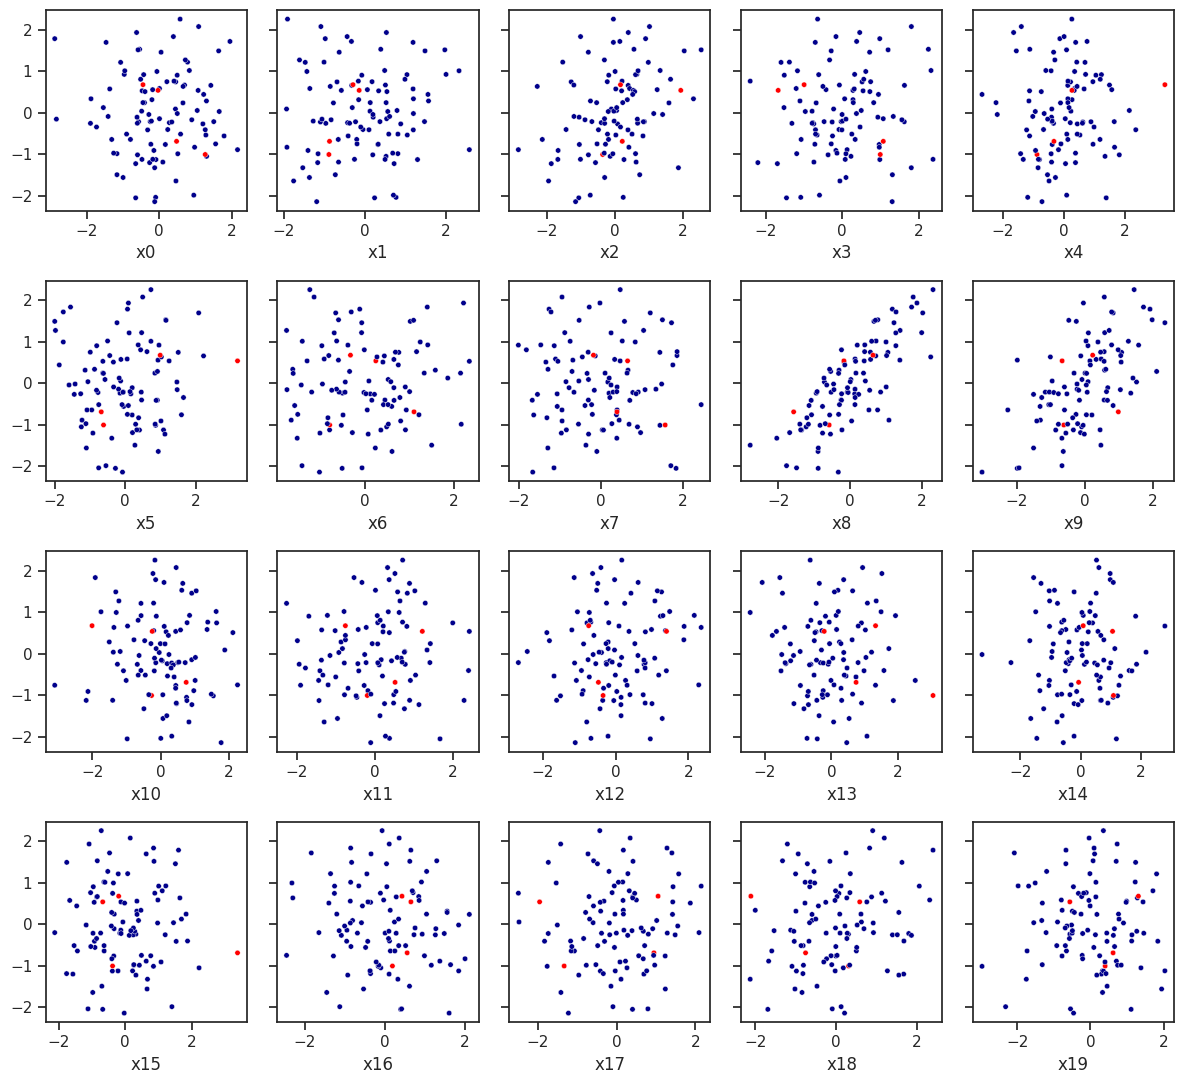

In [2]:
outlier_idx = (X > 3).any(1) | (y > 3).any(1)
colors = ['darkblue'] * len(outlier_idx)
for i in np.nonzero(outlier_idx)[0]: colors[i] = 'red'

fig, axes = plt.subplots(4, 5, sharey=True, figsize=(12, 11))

for i, col in enumerate(data4.columns[:-1]):
    ax = axes.ravel()[i]
    sns.scatterplot(data4.transform(scale), x=col, y='y', s=15, color=colors, ax=ax)
    ax.set_ylabel('')
    # ax.set_xlabel('')
    
fig.tight_layout()

## 4.2 i 4.3
Parametry regresji Ridge mają trochę niższe wartości niż tej bez penalizacji (taki był jej cel). Nakładanie kar na współczynniki ma za zadanie zmuszenie modelu do zmniejszenia złożoności i wyrażenia wariancji danych w prostszy sposób, co teoretycznie ma poprawiać generalizację, a w tym przypadku daje raczej symboliczny zysk.

In [3]:
def test_model(model, X, y):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    score = 0.0

    for train_idx, test_idx in kf.split(X, y):
        X_train, y_train = X[train_idx], y[train_idx]
        X_test, y_test = X[test_idx], y[test_idx]
        
        lm = model.fit(X_train, y_train)
        score += lm.score(X_test, y_test)

    return lm, score / 5

def format_vec(v):
    return '(' + ', '.join(f"{x:+.3f}" for x in v) + ')'

lm, score = test_model(LinearRegression(), X, y)
print(f"Linear Regression coefs: {format_vec(lm.coef_[0])}")
print(f"Linear Regression intercept: {lm.intercept_[0]:.3f}")
print(f"Score for Linear Regression: {score:.4f}\n")

max_score, max_alpha, rlm = 0, 0.1, None

for alpha in np.linspace(0.1, 2.0, 20):
    _rlm, score = test_model(Ridge(alpha=alpha), X, y)
    if score > max_score: 
        max_score, max_alpha, rlm = score, alpha, _rlm

print(f"Ridge Regression coefs: {format_vec(rlm.coef_)}")
print(f"Ridge Regression intercept: {rlm.intercept_[0]:.3f}")
print(f"Score for Ridge Regression (alpha={max_alpha:.1f}): {max_score:.4f}")

Linear Regression coefs: (+0.081, -0.001, +0.398, -0.024, -0.017, +0.023, +0.131, -0.039, +0.776, +0.413, -0.007, -0.005, -0.020, -0.017, +0.031, -0.017, +0.005, +0.014, +0.003, -0.005)
Linear Regression intercept: -0.003
Score for Linear Regression: 0.9845

Ridge Regression coefs: (+0.078, +0.001, +0.392, -0.021, -0.014, +0.021, +0.127, -0.035, +0.763, +0.410, -0.009, -0.002, -0.017, -0.017, +0.026, -0.017, +0.003, +0.013, +0.007, -0.008)
Ridge Regression intercept: -0.003
Score for Ridge Regression (alpha=0.9): 0.9848


In [19]:
corr = data4.corr()['y']
idx = corr.abs().sort_values(ascending=False)[1:10].index
corr

x0     0.011124
x1     0.053079
x2     0.319306
x3     0.061839
x4     0.036706
x5     0.046841
x6     0.061951
x7    -0.011481
x8     0.791969
x9     0.583381
x10   -0.079549
x11    0.058697
x12    0.102124
x13   -0.070079
x14    0.038171
x15   -0.000139
x16   -0.106036
x17    0.041417
x18    0.157091
x19   -0.022020
y      1.000000
Name: y, dtype: float64

In [8]:
lm, score = test_model(LinearRegression(), X[:, [1, 2, 3, 8, 9, 10, 11, 12, 13, 16, 18]], y)
print(f"Linear Regression coefs: {format_vec(lm.coef_[0])}")
print(f"Linear Regression intercept: {lm.intercept_[0]:.3f}")
print(f"Score for Linear Regression: {score:.4f}\n")

Linear Regression coefs: (+0.001, +0.386, +0.004, +0.756, +0.398, -0.021, +0.001, -0.020, -0.007, -0.019, +0.043)
Score for Linear Regression: 0.9692

